# Mess Crowd Prediction using Machine Learning

**Project Type:** Supervised Learning (Regression)

**Target Variable:** `actual_students` (number of students who came to the mess for a meal)

---
## 1. Problem Statement
The college mess needs to plan food, water, and electricity usage effectively. If too few students come, food and resources are wasted. If too many students come and less is prepared, students are dissatisfied.

To help with planning, we build a Machine Learning model that predicts the approximate **number of students (`actual_students`)** who will come for a particular meal (Breakfast/Lunch/Dinner) on a given day based on:

- Day of week
- Meal type
- Whether it is weekend or weekday
- Whether it is exam period
- Whether there is a fest or event
- Weather conditions
- Special menu or normal menu
- Mess capacity and registered students

This is a **regression problem** because the target is a continuous numeric value.


## 2. Mapping with Syllabus
This project covers the following syllabus points:

**Data Preprocessing for Machine Learning**
- Handling missing values
- Outlier detection (IQR method)
- Encoding categorical variables (Yes/No → Label Encoding, Multi-category → One-Hot Encoding)
- Feature scaling (Standardization)
- Train–test split
- Cross-validation

**Supervised Learning**
- Regression model (Linear Regression)
- Model evaluation (MSE, R² score)
- Decision tree
- Random Forest


## 3. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## 4. Load Dataset
We use the **mess survey-style dataset** that contains one record per date and meal type.

In [4]:
df = pd.read_csv("mess_survey_dataset_with_timings.csv")
df


,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,capacity,registered_mess_students,actual_students,water_usage_litres,electricity_units,meal_start_time,meal_end_time
0,2024-07-01,Breakfast,Mon,No,False,No,NaN,No,Rain,No,400,1500,44,266,14.82,07:00,10:00
1,2024-07-01,Lunch,Mon,No,False,No,NaN,No,Cloudy,No,400,1500,109,495,15.01,12:00,15:00
2,2024-07-01,Dinner,Mon,No,False,No,NaN,No,Rain+Cold,Yes,400,1500,345,1020,25.72,19:00,22:00
3,2024-07-02,Breakfast,Tue,No,False,No,NaN,No,Rain,No,400,1500,75,421,20.93,07:00,10:00
4,2024-07-02,Lunch,Tue,No,False,No,NaN,No,Rain,No,400,1500,123,613,16.31,12:00,15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2025-05-30,Lunch,Fri,No,False,No,NaN,No,Sunny,No,400,1500,124,579,17.89,12:00,15:00
1001,2025-05-30,Dinner,Fri,No,False,No,NaN,No,Sunny,No,400,1500,267,1169,28.04,19:00,22:00
1002,2025-05-31,Breakfast,Sat,Yes,False,No,NaN,No,Sunny,No,400,1500,28,242,17.53,07:00,10:00
1003,2025-05-31,Lunch,Sat,Yes,False,Yes,SportsDay,No,Sunny,No,400,1500,118,540,18.79,12:00,15:00


In [5]:
df.columns = df.columns.str.strip()
df

,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,capacity,registered_mess_students,actual_students,water_usage_litres,electricity_units,meal_start_time,meal_end_time
0,2024-07-01,Breakfast,Mon,No,False,No,NaN,No,Rain,No,400,1500,44,266,14.82,07:00,10:00
1,2024-07-01,Lunch,Mon,No,False,No,NaN,No,Cloudy,No,400,1500,109,495,15.01,12:00,15:00
2,2024-07-01,Dinner,Mon,No,False,No,NaN,No,Rain+Cold,Yes,400,1500,345,1020,25.72,19:00,22:00
3,2024-07-02,Breakfast,Tue,No,False,No,NaN,No,Rain,No,400,1500,75,421,20.93,07:00,10:00
4,2024-07-02,Lunch,Tue,No,False,No,NaN,No,Rain,No,400,1500,123,613,16.31,12:00,15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2025-05-30,Lunch,Fri,No,False,No,NaN,No,Sunny,No,400,1500,124,579,17.89,12:00,15:00
1001,2025-05-30,Dinner,Fri,No,False,No,NaN,No,Sunny,No,400,1500,267,1169,28.04,19:00,22:00
1002,2025-05-31,Breakfast,Sat,Yes,False,No,NaN,No,Sunny,No,400,1500,28,242,17.53,07:00,10:00
1003,2025-05-31,Lunch,Sat,Yes,False,Yes,SportsDay,No,Sunny,No,400,1500,118,540,18.79,12:00,15:00


In [6]:
df.shape

(1005, 17)

In [7]:
df.head()

,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,capacity,registered_mess_students,actual_students,water_usage_litres,electricity_units,meal_start_time,meal_end_time
0,2024-07-01,Breakfast,Mon,No,False,No,NaN,No,Rain,No,400,1500,44,266,14.82,07:00,10:00
1,2024-07-01,Lunch,Mon,No,False,No,NaN,No,Cloudy,No,400,1500,109,495,15.01,12:00,15:00
2,2024-07-01,Dinner,Mon,No,False,No,NaN,No,Rain+Cold,Yes,400,1500,345,1020,25.72,19:00,22:00
3,2024-07-02,Breakfast,Tue,No,False,No,NaN,No,Rain,No,400,1500,75,421,20.93,07:00,10:00
4,2024-07-02,Lunch,Tue,No,False,No,NaN,No,Rain,No,400,1500,123,613,16.31,12:00,15:00


In [10]:
df = df.drop(columns=['meal_start_time', 'meal_end_time'])
df.head(3)

,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,capacity,registered_mess_students,actual_students,water_usage_litres,electricity_units
0,2024-07-01,Breakfast,Mon,No,False,No,NaN,No,Rain,No,400,1500,44,266,14.82
1,2024-07-01,Lunch,Mon,No,False,No,NaN,No,Cloudy,No,400,1500,109,495,15.01
2,2024-07-01,Dinner,Mon,No,False,No,NaN,No,Rain+Cold,Yes,400,1500,345,1020,25.72


## 5. Exploratory Data Analysis (EDA)

In [11]:
df.describe()

,capacity,registered_mess_students,actual_students,water_usage_litres,electricity_units
count,1005.0,1005.0,1005.000000,1005.000000,1005.000000
mean,400.0,1500.0,159.111443,655.821891,20.067294
std,0.0,0.0,111.041186,374.680038,3.772718
min,400.0,1500.0,8.000000,126.000000,12.340000
25%,400.0,1500.0,72.000000,362.000000,17.130000
50%,400.0,1500.0,116.000000,523.000000,19.930000
75%,400.0,1500.0,268.000000,945.000000,22.700000
max,400.0,1500.0,400.000000,1794.000000,31.140000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1005 non-null   object 
 1   meal_type                 1005 non-null   object 
 2   day_of_week               1005 non-null   object 
 3   is_weekend                1005 non-null   object 
 4   is_holiday_month          1005 non-null   bool   
 5   is_fest_or_event          1005 non-null   object 
 6   event_type                152 non-null    object 
 7   is_exam_period            1005 non-null   object 
 8   weather                   1005 non-null   object 
 9   special_menu              1005 non-null   object 
 10  capacity                  1005 non-null   int64  
 11  registered_mess_students  1005 non-null   int64  
 12  actual_students           1005 non-null   int64  
 13  water_usage_litres        1005 non-null   int64  
 14  electric

In [13]:
# Unique values in key categorical columns
for col in ['meal_type', 'day_of_week', 'weather', 'event_type']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: meal_type
meal_type
Breakfast    335
Lunch        335
Dinner       335
Name: count, dtype: int64

Column: day_of_week
day_of_week
Mon    144
Tue    144
Wed    144
Thu    144
Fri    144
Sat    144
Sun    141
Name: count, dtype: int64

Column: weather
weather
Sunny        462
Cloudy       318
Rain         123
Rain+Cold    102
Name: count, dtype: int64

Column: event_type
event_type
Freshers         35
CulturalNight    32
Farewell         30
SportsDay        29
Fest             26
Name: count, dtype: int64


In [14]:
print(df.columns)

Index(['date', 'meal_type', 'day_of_week', 'is_weekend', 'is_holiday_month',
       'is_fest_or_event', 'event_type', 'is_exam_period', 'weather',
       'special_menu', 'capacity', 'registered_mess_students',
       'actual_students', 'water_usage_litres', 'electricity_units'],
      dtype='object')


In [16]:
print(df.columns)

Index(['date', 'meal_type', 'day_of_week', 'is_weekend', 'is_holiday_month',
       'is_fest_or_event', 'event_type', 'is_exam_period', 'weather',
       'special_menu', 'registered_mess_students', 'actual_students',
       'water_usage_litres', 'electricity_units'],
      dtype='object')


# DATA VISUALIZATION

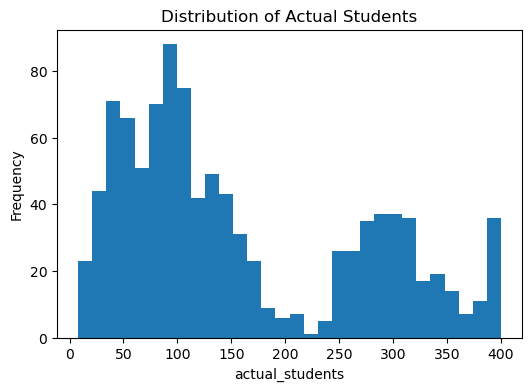

In [17]:
# Distribution of actual_students
#How many times did X number of students come for a meal?
plt.figure(figsize=(6,4))
plt.hist(df['actual_students'], bins=30)
plt.title('Distribution of Actual Students')
plt.xlabel('actual_students')
plt.ylabel('Frequency')
plt.show()

In [18]:
#The histogram represents how actual student turnout varies throughout the year across all meals.It helps identify typical attendance patterns, detect unusually high/low days, and understand the spread of the target variable before running machine learning model

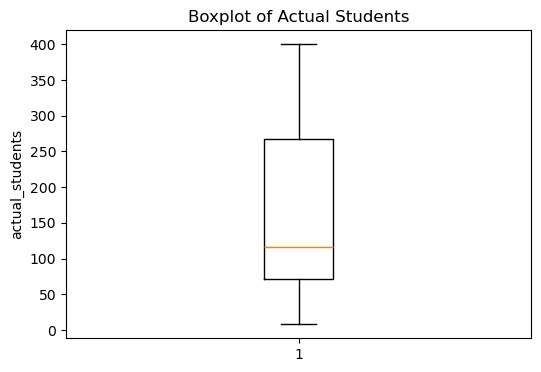

In [19]:
# Boxplot for actual_students to visually inspect outliers
plt.figure(figsize=(6,4))
plt.boxplot(df['actual_students'])
plt.title('Boxplot of Actual Students')
plt.ylabel('actual_students')
plt.show()

In [20]:
#Breakfast is very low most days → many points near the lower range
#Lunch is moderate → spread wider
#Dinner is highest → upper whiskers higher

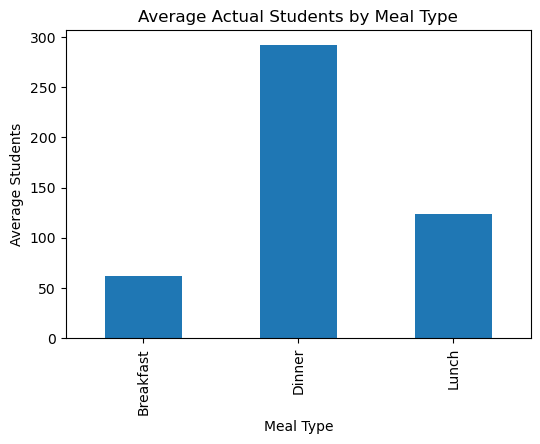

In [21]:
# Average students by meal type
plt.figure(figsize=(6,4))
df.groupby('meal_type')['actual_students'].mean().plot(kind='bar')
plt.title('Average Actual Students by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Students')
plt.show()

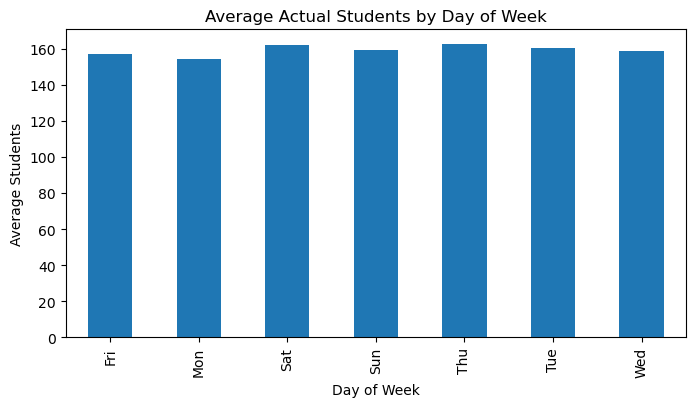

In [22]:
# Average students by day of week
plt.figure(figsize=(8,4))
df.groupby('day_of_week')['actual_students'].mean().plot(kind='bar')
plt.title('Average Actual Students by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Students')
plt.show()

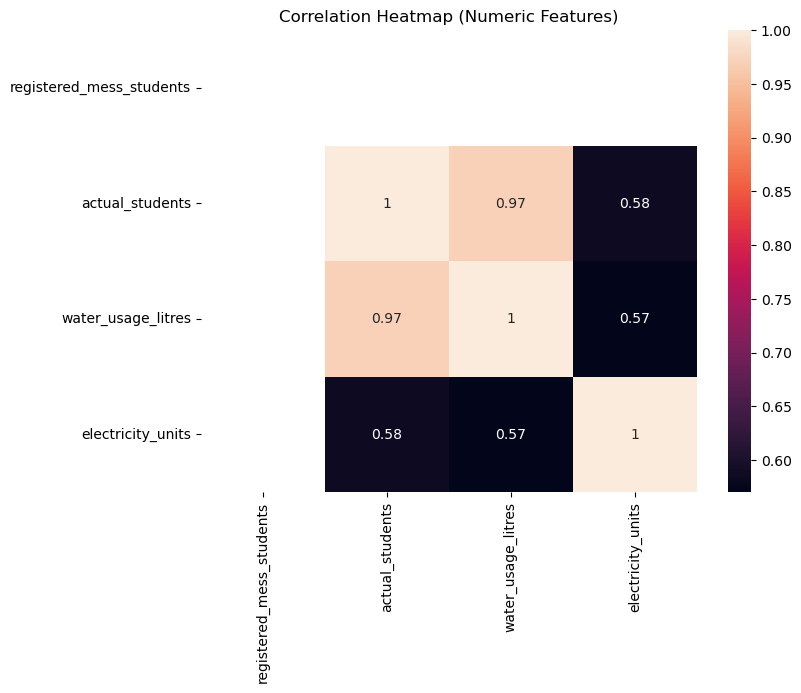

In [23]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [25]:
df

,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,registered_mess_students,actual_students,water_usage_litres,electricity_units
0,2024-07-01,Breakfast,Mon,No,False,No,NaN,No,Rain,No,1500,44,266,14.82
1,2024-07-01,Lunch,Mon,No,False,No,NaN,No,Cloudy,No,1500,109,495,15.01
2,2024-07-01,Dinner,Mon,No,False,No,NaN,No,Rain+Cold,Yes,1500,345,1020,25.72
3,2024-07-02,Breakfast,Tue,No,False,No,NaN,No,Rain,No,1500,75,421,20.93
4,2024-07-02,Lunch,Tue,No,False,No,NaN,No,Rain,No,1500,123,613,16.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2025-05-30,Lunch,Fri,No,False,No,NaN,No,Sunny,No,1500,124,579,17.89
1001,2025-05-30,Dinner,Fri,No,False,No,NaN,No,Sunny,No,1500,267,1169,28.04
1002,2025-05-31,Breakfast,Sat,Yes,False,No,NaN,No,Sunny,No,1500,28,242,17.53
1003,2025-05-31,Lunch,Sat,Yes,False,Yes,SportsDay,No,Sunny,No,1500,118,540,18.79


## 6. Data Preprocessing
We now perform the following steps:
1. Handle missing values
2. Encode binary Yes/No variables
3. One-Hot Encode categorical variables
4. Detect and remove outliers in `actual_students` using IQR method
5. Prepare final feature matrix **X** and target vector **y**


In [23]:
df.isnull().sum()

date                          0
meal_type                     0
day_of_week                   0
is_weekend                    0
is_holiday_month              0
is_fest_or_event              0
event_type                  853
is_exam_period                0
weather                       0
special_menu                  0
registered_mess_students      0
actual_students               0
water_usage_litres            0
electricity_units             0
meal_start_time               0
meal_end_time                 0
dtype: int64

In [24]:
# Simple missing value handling: forward fill, then back fill as backup
df = df.fillna(method='ffill').fillna(method='bfill')
df.isnull().sum()

date                        0
meal_type                   0
day_of_week                 0
is_weekend                  0
is_holiday_month            0
is_fest_or_event            0
event_type                  0
is_exam_period              0
weather                     0
special_menu                0
registered_mess_students    0
actual_students             0
water_usage_litres          0
electricity_units           0
meal_start_time             0
meal_end_time               0
dtype: int64

### 6.1 Encode Yes/No Columns (Label Encoding)

In [25]:
yes_no_cols = ['is_weekend', 'is_fest_or_event', 'is_exam_period', 'special_menu']

df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})
df[yes_no_cols].head()


,is_weekend,is_fest_or_event,is_exam_period,special_menu
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,0


,date,meal_type,day_of_week,is_weekend,is_holiday_month,is_fest_or_event,event_type,is_exam_period,weather,special_menu,registered_mess_students,actual_students,water_usage_litres,electricity_units
0,2024-07-01,Breakfast,Mon,0,False,0,CulturalNight,0,Rain,0,1500,44,266,14.82
1,2024-07-01,Lunch,Mon,0,False,0,CulturalNight,0,Cloudy,0,1500,109,495,15.01
2,2024-07-01,Dinner,Mon,0,False,0,CulturalNight,0,Rain+Cold,1,1500,345,1020,25.72


### 6.3 One-Hot Encode Categorical Columns

In [27]:
categorical_cols = ['meal_type', 'day_of_week', 'weather', 'event_type']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,date,is_weekend,is_holiday_month,is_fest_or_event,is_exam_period,special_menu,registered_mess_students,actual_students,water_usage_litres,electricity_units,...,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,weather_Rain,weather_Rain+Cold,weather_Sunny,event_type_Farewell,event_type_Fest,event_type_Freshers,event_type_SportsDay
0,2024-07-01,0,False,0,0,0,1500,44,266,14.82,...,False,False,False,True,False,False,False,False,False,False
1,2024-07-01,0,False,0,0,0,1500,109,495,15.01,...,False,False,False,False,False,False,False,False,False,False
2,2024-07-01,0,False,0,0,1,1500,345,1020,25.72,...,False,False,False,False,True,False,False,False,False,False
3,2024-07-02,0,False,0,0,0,1500,75,421,20.93,...,False,True,False,True,False,False,False,False,False,False
4,2024-07-02,0,False,0,0,0,1500,123,613,16.31,...,False,True,False,True,False,False,False,False,False,False


### 6.4 Outlier Detection using IQR Method on `actual_students`

In [28]:
Q1 = df_encoded['actual_students'].quantile(0.25)
Q3 = df_encoded['actual_students'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)


Lower bound: -222.0
Upper bound: 562.0


In [29]:
before_shape = df_encoded.shape
df_encoded = df_encoded[
    (df_encoded['actual_students'] >= lower_bound) & 
    (df_encoded['actual_students'] <= upper_bound)
]
after_shape = df_encoded.shape

print('Shape before removing outliers:', before_shape)
print('Shape after removing outliers:', after_shape)

Shape before removing outliers: (1005, 25)
Shape after removing outliers: (1005, 25)


### 6.5 Define Features (X) and Target (y)

In [30]:
target_col = 'actual_students'

y = df_encoded[target_col]
X = df_encoded.drop(columns=[target_col])

X.shape, y.shape


((1005, 24), (1005,))

## 7. Train–Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)

X_train.shape, X_test.shape


((804, 24), (201, 24))

## 8. Feature Scaling (Standardization)

In [32]:
X_train.dtypes[X_train.dtypes == 'object']


date    object
dtype: object

In [33]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_train_scaled.shape, X_test_scaled.shape


((804, 7), (201, 7))

## 9. Model Building – Linear Regression

In [34]:
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

LinearRegression()

## 10. Model Evaluation

In [35]:
y_pred = reg_model.predict(X_test_scaled)

# Evaluation metrics (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 690.3091684462106
R² Score: 0.9390408184345278


In [36]:
rmse = np.sqrt(690.3091684462106)
print(rmse)


26.273735334858852


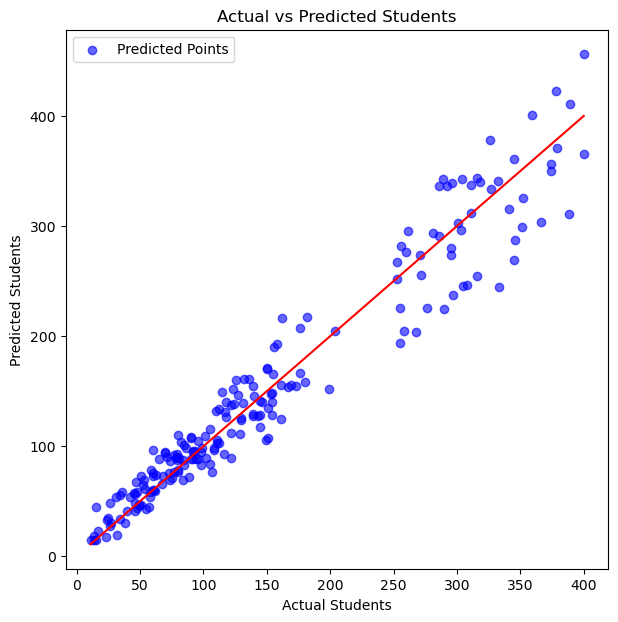

In [37]:
plt.figure(figsize=(7,7))

# Scatter points
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted Points')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red')

plt.xlabel('Actual Students')
plt.ylabel('Predicted Students')
plt.title('Actual vs Predicted Students')
plt.legend()
plt.show()


## 11. Cross-Validation 

In [38]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(518.3432835820895, 0.9542266222419646)

In [39]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(421.2747536069652, 0.9627984599250218)

In [40]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse, mse_dt, mse_rf],
    "R² Score": [r2, r2_dt, r2_rf]
}
pd.DataFrame(results)


,Model,MSE,R² Score
0,Linear Regression,690.309168,0.939041
1,Decision Tree,518.343284,0.954227
2,Random Forest,421.274754,0.962798


## 12. Conclusion
In this project, we built a **Linear Regression model** to predict the number of students coming to the mess for a particular meal using historical survey-style data.

**Steps covered:**
- Performed EDA with summary statistics and visualizations
- Handled missing values
- Encoded categorical variables using Label Encoding and One-Hot Encoding
- Detected and removed outliers using the IQR method
- Scaled features using StandardScaler
- Applied train–test split
- Trained a Linear Regression model
- Evaluated performance using MSE and R² score
- Used Random forst and decidion tree to check model stability

**How this helps the mess management:**
- Better planning of food quantity
- Reduction of food wastage
- Efficient usage of water and electricity
- Data-driven decision making for special events and exam periods
